In [148]:
#Importing Necessities

import re
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from wordcloud import WordCloud

In [2]:
# Read data.csv
data = pd.read_csv('data.csv', encoding='latin-1')
data.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [3]:
# Cek jumlah data (baris, kolom)
data.shape

(13169, 13)

In [149]:
# cek missing values
data_non_dup.isna().sum

<bound method DataFrame.sum of        Tweet     HS  Abusive  HS_Individual  HS_Group  HS_Religion  HS_Race  \
0      False  False    False          False     False        False    False   
1      False  False    False          False     False        False    False   
2      False  False    False          False     False        False    False   
3      False  False    False          False     False        False    False   
4      False  False    False          False     False        False    False   
...      ...    ...      ...            ...       ...          ...      ...   
13164  False  False    False          False     False        False    False   
13165  False  False    False          False     False        False    False   
13166  False  False    False          False     False        False    False   
13167  False  False    False          False     False        False    False   
13168  False  False    False          False     False        False    False   

       HS_Physical  

In [65]:
# Cek jumlah data duplikat dari kolom Tweet
data_subset.duplicated('Tweet').sum()

146

In [66]:
# Drop duplicate dari kolom Tweet
data_non_dup = data.drop_duplicates('Tweet')
data_non_dup.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [68]:
# Cek jumlah data setelah drop duplicates
data_non_dup.shape

(13023, 13)

In [81]:
# Data cleansing
def preprocess(text):
    text = re.sub('\n',' ',text) # Remove every '\n'
    text = re.sub('rt',' ',text) # Remove every retweet symbol
    text = re.sub('RT',' ',text)
    text = re.sub('user',' ',text) # Remove every username
    text = re.sub('USER',' ',text)
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) # Remove every URL
    text = re.sub('  +', ' ', text) # Remove extra spaces
    text = re.sub('[^0-9a-zA-Z]+', ' ', text) # Remove non-alphanumerical 
    return text

In [82]:
data_non_dup['Tweet'] = data['Tweet'].apply(preprocess)

C:\Users\nde\AppData\Local\Temp\ipykernel_12220\1617330065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_non_dup['Tweet'] = data['Tweet'].apply(preprocess)


In [83]:
print("Shape: ", data_non_dup.shape)
data_non_dup.head(15)

Shape:  (13023, 13)


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,disaat semua cowok berusaha melacak perhatian...,1,1,1,0,0,0,0,0,1,1,0,0
1,siapa yang telat ngasih tau elu edan sarap gu...,0,1,0,0,0,0,0,0,0,0,0,0
2,41 Kadang aku berfikir kenapa aku tetap percay...,0,0,0,0,0,0,0,0,0,0,0,0
3,AKU ITU AKU n nKU TAU MATAMU SIPIT TAPI DILIA...,0,0,0,0,0,0,0,0,0,0,0,0
4,Kaum cebong kapir udah keliatan dongoknya dar...,1,1,0,1,1,0,0,0,0,0,1,0
5,Ya bani taplak dkk xf0 x9f x98 x84 xf0 x9f x9...,1,1,0,1,0,0,0,0,1,0,1,0
6,deklarasi pilkada 2018 aman dan anti hoax warg...,0,0,0,0,0,0,0,0,0,0,0,0
7,Gue baru aja kelar re watch Aldnoah Zero palin...,0,1,0,0,0,0,0,0,0,0,0,0
8,Nah admin belanja satu lagi po terbaik nak mak...,0,0,0,0,0,0,0,0,0,0,0,0
9,Enak lg klo smbil ngewe,0,1,0,0,0,0,0,0,0,0,0,0


In [114]:
# 1. Jumlah data non duplikat yang mengandung abusive
data_non_dup.Abusive.value_counts()

Abusive
0    8031
1    4992
Name: count, dtype: int64

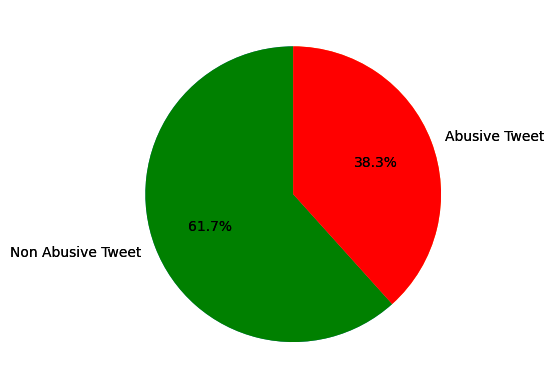

In [119]:
# Visualisasi dari persentase tweet yang mengandung kata kasar (abusive tweet) dengan tweet yang tidak mengandung kata kasar (non abusive tweet)
sizes = [8031, 4992]  
labels = ['Non Abusive Tweet', 'Abusive Tweet']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
colors = ['green', 'red'] 
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.show()

In [96]:
# Membuat kolom baru yang berisi info jumlah karakter/tweet
data_non_dup['total_char'] = data_non_dup.Tweet.apply(len)

C:\Users\nde\AppData\Local\Temp\ipykernel_12220\1797627155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_non_dup['total_char'] = data_non_dup.Tweet.apply(len)


In [101]:
# Membuat kolom baru yang berisi info jumlah kata/tweet
data_non_dup['total_words'] = data_non_dup.Tweet.apply(lambda x: len(x.split()))

C:\Users\nde\AppData\Local\Temp\ipykernel_12220\143159416.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_non_dup['total_words'] = data_non_dup.Tweet.apply(lambda x: len(x.split()))


In [102]:
# Save Preprocessed Data
data_non_dup.to_csv('preprocessed_indonesian_toxic_tweet.csv', index=False)

In [110]:
# Menampilkan kolom Tweet, jumlah karakter (total_char), dan jumlah kata (total_words)
subset = data_non_dup[['Tweet', 'total_char', 'total_words']]
subset.head()

,Tweet,total_char,total_words
0,disaat semua cowok berusaha melacak perhatian...,129,21
1,siapa yang telat ngasih tau elu edan sarap gu...,107,19
2,41 Kadang aku berfikir kenapa aku tetap percay...,248,38
3,AKU ITU AKU n nKU TAU MATAMU SIPIT TAPI DILIA...,66,14
4,Kaum cebong kapir udah keliatan dongoknya dar...,80,12


In [112]:
# EDA - UNIVARIATE - MEASURES OF CENTRAL TENDENCY - MEAN
# Mengetahui rata-rata dari jumlah karakter dan jumlah kata per tweet
df = data_non_dup[['total_char', 'total_words']]
df.mean()

total_char     104.354911
total_words     17.241112
dtype: float64

In [113]:
# EDA - UNIVARIATE - MEASURES OF CENTRAL TENDENCY - MEDIAN
# Mengetahui median dari jumlah karakter dan jumlah kata per tweet
df.median()

total_char     90.0
total_words    15.0
dtype: float64

In [150]:
# EDA - UNIVARIATE - MEASURES OF CENTRAL TENDENCY - MODE
# Mengetahui mode dari jumlah karakter dan jumlah kata per tweet
df.mode()

,total_char,total_words
0,77,10


In [157]:
# EDA - UNIVARIATE - MEASURES OF SPREAD - TOTAL CHARACTER

# Cari nilai minimum
p0 = df.total_char.min()

# Cari nilai maksimum
p100 = df.total_char.max()

# Cari Quartile 1 
q1 = df.total_char.quantile(0.25)

# Cari Quartile 2 
q2 = df.total_char.quantile(0.5)

# Cari Quartile 3
q3 = df.total_char.quantile(0.75)

# Cari IQR
iqr = q3-q1

# Cari batas bawah
lower_limit = q1-1.5*iqr

# Cari batas atas
upper_limit = q3+1.5*iqr

print("Batas Bawah 'total_char':", lower_limit)
print("Nilai minimum", p0)

if lower_limit < p0:
    print("Tidak ada outlier dari sisi batas bawah")
else:
    print("Ada outlier dari sisi batas bawah")
    
print()
print("Batas Atas 'total_char':", upper_limit)
print("Nilai maksimum", p100)

if upper_limit > p100:
    print("Tidak ada outlier dari sisi batas atas")
else:
    print("Ada outlier dari sisi batas atas")

Batas Bawah 'total_char': -82.5
Nilai minimum 1
Tidak ada outlier dari sisi batas bawah

Batas Atas 'total_char': 273.5
Nilai maksimum 545
Ada outlier dari sisi batas atas


In [160]:
# EDA - UNIVARIATE - MEASURES OF SPREAD - TOTAL WORD

# Cari nilai minimum
p0 = df.total_words.min()

# Cari nilai maksimum
p100 = df.total_words.max()

# Cari Quartile 1 
q1 = df.total_words.quantile(0.25)

# Cari Quartile 2 
q2 = df.total_words.quantile(0.5)

# Cari Quartile 3
q3 = df.total_words.quantile(0.75)

# Cari IQR
iqr = q3-q1

# Cari batas bawah
lower_limit = q1-1.5*iqr

# Cari batas atas
upper_limit = q3+1.5*iqr

print("Batas Bawah 'total_word':", lower_limit)
print("Nilai minimum", p0)

if lower_limit < p0:
    print("Tidak ada outlier dari sisi batas bawah")
else:
    print("Ada outlier dari sisi batas bawah")
    
print()
print("Batas Atas 'total_word':", upper_limit)
print("Nilai maksimum", p100)

if upper_limit > p100:
    print("Tidak ada outlier dari sisi batas atas")
else:
    print("Ada outlier dari sisi batas atas")

Batas Bawah 'total_word': -13.5
Nilai minimum 0
Tidak ada outlier dari sisi batas bawah

Batas Atas 'total_word': 46.5
Nilai maksimum 121
Ada outlier dari sisi batas atas


In [123]:
# EDA - UNIVARIATE - DESCRIBE SHAPE OF DISTRIBUTION - SKEWNESS 
df.skew()

total_char     0.732486
total_words    0.885325
dtype: float64

In [124]:
# EDA - UNIVARIATE - DESCRIBE SHAPE OF DISTRIBUTION - KURTOSIS
df.kurtosis()

total_char    -0.303430
total_words    0.535698
dtype: float64

D:\BINAR - DATA SCIENCE\my_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


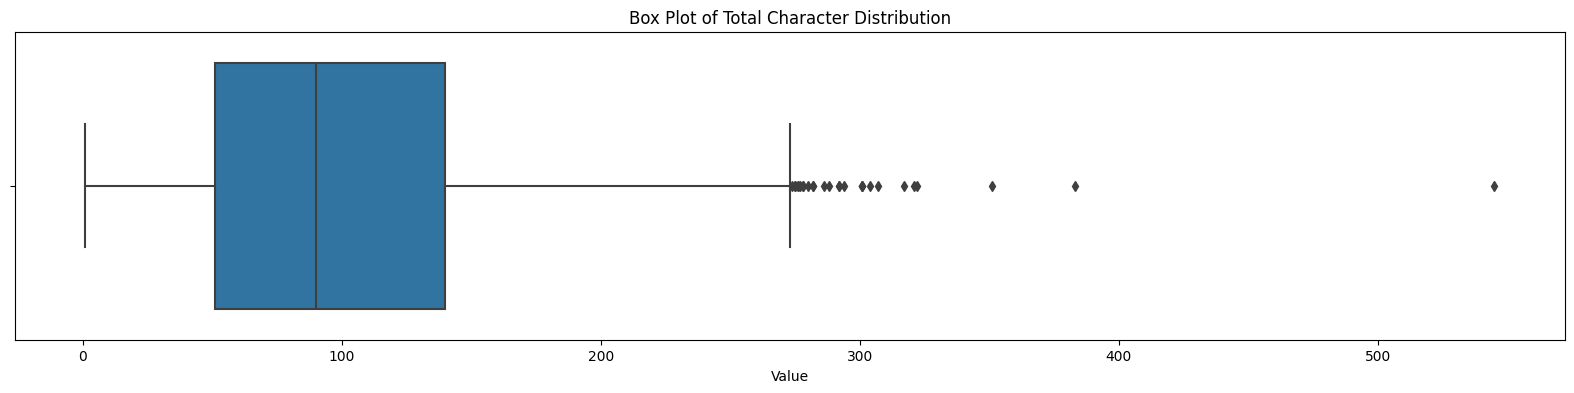

In [164]:
# EDA - UNIVARIATE - DESCRIBE SHAPE OF DISTRIBUTION
# Visualisasi distribusi data dari jumlah karakter (total_char)
plt.figure(figsize=(20, 4))  # Set the figure size (optional)
sns.boxplot(x='total_char', data=df)  # Replace 'column_name' with the column you want to visualize
plt.title('Box Plot of Total Character Distribution')
plt.xlabel('Value')
plt.show()

D:\BINAR - DATA SCIENCE\my_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


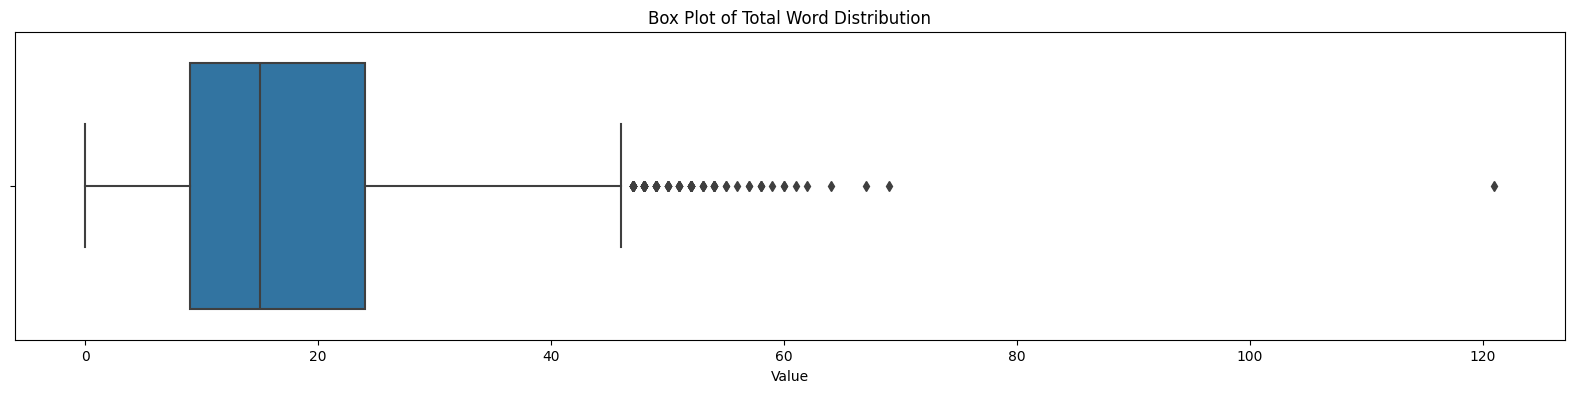

In [165]:
# EDA - UNIVARIATE - DESCRIBE SHAPE OF DISTRIBUTION - SKEWNESS 
# Visualisasi distribusi data dari jumlah kata (total_words)
plt.figure(figsize=(20, 4))  # Set the figure size (optional)
sns.boxplot(x='total_words', data=df)  # Replace 'column_name' with the column you want to visualize
plt.title('Box Plot of Total Word Distribution')
plt.xlabel('Value')
plt.show()

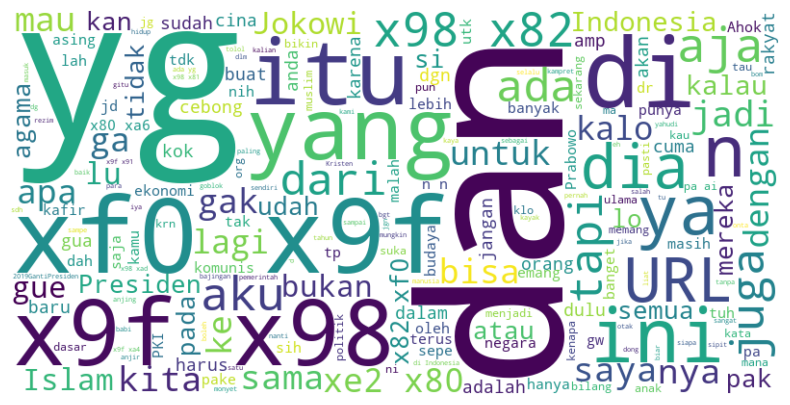

In [136]:
# Visualisasi kata yang sering muncul menggunakan wordcloud
text = data_non_dup['Tweet'].str.cat(sep=' ')

# Create the WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [137]:
# EDA - BIVARIATE - PEARSON CORRELATION 
# Mengukur korelasi antara jumlah karakter (total_char) dengan jumlah kata (total_words)
df.corr()

,total_char,total_words
total_char,1.000000,0.970899
total_words,0.970899,1.000000


<Axes: xlabel='total_words', ylabel='total_char'>

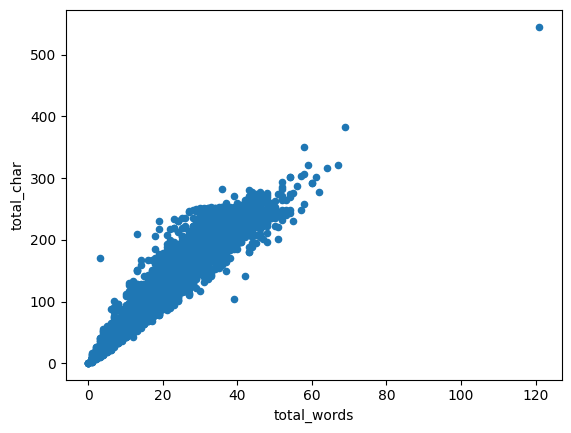

In [141]:
# Visualisasi hasil korelasi jumlah karakter (total_char) dengan jumlah kata (total_words) antara menggunakan scatter
df.plot(x='total_words', y='total_char',kind = 'scatter')